In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

In [38]:
img = cv2.imread('./1-2.png', 0)
img

array([[238, 234, 226, ..., 194, 186, 178],
       [238, 234, 226, ..., 194, 186, 178],
       [238, 234, 226, ..., 194, 186, 178],
       ...,
       [117, 121, 109, ...,  72,  68,  60],
       [117, 105,  93, ...,  72,  68,  52],
       [117, 109,  93, ...,  93,  80,  64]], dtype=uint8)

In [39]:
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

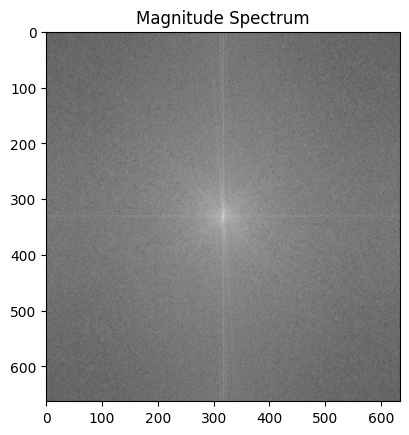

In [40]:
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.show()

In [41]:
def onclick(event):
    x = int(event.xdata)
    y = int(event.ydata)
    print('Clicked on pixel (', x, ', ', y, ') with magnitude ', magnitude_spectrum[y, x])
    
cid = plt.gcf().canvas.mpl_connect('button_press_event', onclick)
plt.show()

<Figure size 640x480 with 0 Axes>

In [28]:
# 指定高斯核的大小和标准差
sigma = 5
kernel_size = 21

In [29]:
# 创建高斯核
kernel = np.zeros((kernel_size, kernel_size))
m = kernel_size // 2
for x in range(-m, m+1):
    for y in range(-m, m+1):
        kernel[x+m, y+m] = np.exp(-(x**2 + y**2) / (2*sigma**2))
kernel = kernel / np.sum(kernel)

In [30]:
# 应用高斯滤波器
smoothed_img = ndimage.convolve(img, kernel)

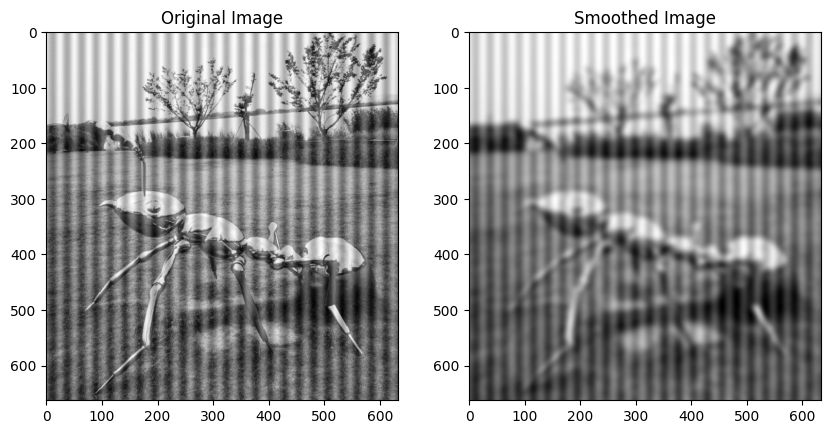

In [32]:
# 显示原始图像和平滑处理后的图像
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(smoothed_img, cmap='gray')
axs[1].set_title('Smoothed Image')
plt.show()

In [24]:
# Compute the magnitude spectrum of the image
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift))

In [25]:
# Define the filter parameters
nyquist = 0.5 * img.shape[0]
cutoff_low = 0.45 * nyquist
cutoff_high = 0.55 * nyquist
order = 2

In [26]:
# Create the filter coefficients
b, a = butter(order, [cutoff_low, cutoff_high], btype='bandstop', analog=False, output='ba')

ValueError: Digital filter critical frequencies must be 0 < Wn < 1